# SDGRegressor

La regresión lineal se puede realizar con SGDRegressor, pero hay que especificar la función de pérdida específica y la penalización y utiliza el descenso de gradiente estocástico (SGD) para realizar el ajuste. 

SGD se ejecuta repetidamente sobre cada registro de los datos de entrenamiento y actualiza los parámetros de acuerdo con el gradiente del error con respecto a cada punto de datos individual. 

Hay que establecer más parametros para obtener una buena convergencia. 
Por el otro lado, la clase LinearRegression es menos general y siempre usa la pérdida por mínimos cuadrados, y usa el método analítico de Ecuación Normal para resolver el ajuste. 

En todos los casos, la herramienta StandardScaler automatiza la escala de características (por media y varianza).


## Importación de librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importación del dataset

In [2]:
dataset = pd.read_csv('datos_salarios.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## División del dataset en el conjunto de entrenamiento (Training Set) y el conjunto de prueba (Test Set) 

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

#Recuerde: train para entrenar, test para evaluar

## Construcción y entrenamiento del modelo de regresión lineal simple en el conjunto de entrenamiento

In [4]:
from sklearn.linear_model import SGDRegressor #la clase SGDRegressor del modulo linear_model
regressor = SGDRegressor() #objeto
regressor.fit(X_train, y_train) #metodo fit, entrena el regresor sobre la matriz de caracteristicas (variables independientes)
#para aprender a predecir el y (variable dependiente)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

## Predicción de los resultados del Test set

In [5]:
y_pred = regressor.predict(X_test) #aplicamos el metodo predict al X_test y los guardamos en una nueva variable y_pred (valarios predecidor)

## Visualización de los resultados del Training Set 

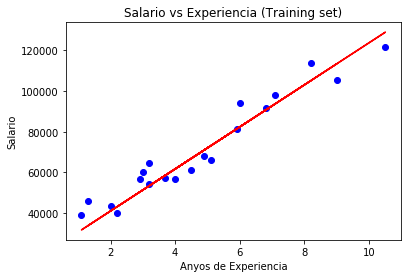

In [6]:
plt.scatter(X_train, y_train, color = 'blue') #SCATTER =  x vs y
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Salario vs Experiencia (Training set)')
plt.xlabel('Anyos de Experiencia')
plt.ylabel('Salario')
plt.show()

## Visualización de los resultados del Test Set

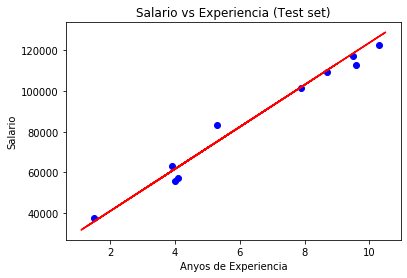

In [7]:
plt.scatter(X_test, y_test, color = 'b')
plt.plot(X_train, regressor.predict(X_train), color = 'r') #observacion. El modelo ha construido una funcion lineal,
#para poder predecir el salario en funcion de la experiencia. Esta funcion es unica, y por lo tanto no necesitamos usar 
#el X_test y predict y_test. La linea de regresion viene de una ecuacion unica.
#el x_test e y_test no han sido vistos durante el entrenamiento. 
plt.title('Salario vs Experiencia (Test set)')
plt.xlabel('Anyos de Experiencia')
plt.ylabel('Salario')
plt.show()

## Haciendo una nueva predicción (por ejemplo, el salario de un empleado con 12 años de experiencia)

In [8]:
print(regressor.predict([[12]]))

[144371.03270449]


**Obs.**: Para las predicciones, el registro siempre va entre "[[ ]]"


**Recuerde**: <br>
1 = escalar <br> 
[1]= 1D array <br> 
[[1]]= 2D array 

## ¿Cuál es la ecuacion de la regresión que ha modelado el algoritmo?

In [9]:
print(regressor.coef_) 
print(regressor.intercept_)

[10328.23078861]
[20432.26324122]


Por tanto, la ecuación de nuestro modelo de regresión lineal simple es: <br> 
Salario = 10328.23 * AnyoExperiencia + 20432.26€

**Nota**: 
Los coeficientes ("coef e "intercept_")son atributos de nuestro objeto "regresor".
